# Lecture II: Solving math problems with MATLAB

"*Code is like humor. When you have to explain it, it's bad*" - Cory House

Welcome to the second lecture! Up to now, we have been solving problems that we can actually solve. The idea of programming is powerful because it allows us to solve problems that we cannot solve by ourselves!

## 1. Bisection Algorithm

Sadly, the number of problems we cannot solve ourselves is enormous. We only realize this sometimes because, in our education, we are taught problems to which we can find a solution. So, let's see a problem that we cannot solve. Try to find the price that makes the demand equal to one in this equation:

$$ Q = 0.8 p^{-0.5} + 0.5 p^{-0.6} $$

Hmm is difficult. But wait, how do we know that this has a solution? Maybe the equation is discontinuous or something similar, and it does not have a solution when Q is equal to 2.5.

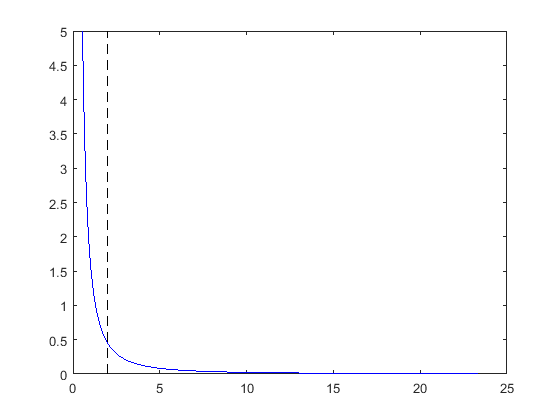

In [1]:
p = linspace(0,5,1000);
q = zeros(1,1000);

for i=1:length(q)
    q(i)=0.8*p(i)^(-0.5)+0.5*p(i)^(-0.6);
end

figure
plot(q,p,'blue')
hold on
plot(2*ones(1,length(p)),p,'black','Linestyle','--')

It looks pretty continuous. So, how do we find the value? An easy trick is to use the bisection algorithm. To understand how it works, we need to take 2 and subtract the values from our function, and plot it again.

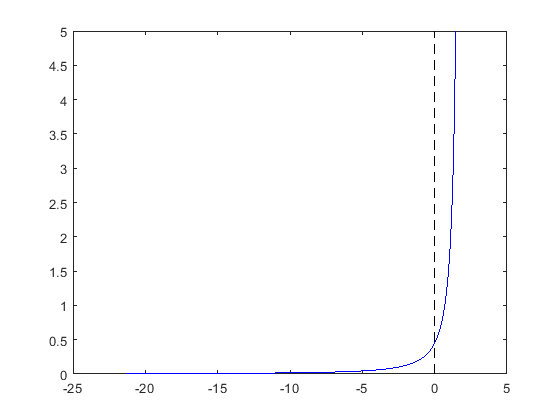

In [2]:
p = linspace(0,5,1000);
q = zeros(1,1000);

for i=1:length(q)
    q(i)=2-0.8*p(i)^(-0.5)-0.5*p(i)^(-0.6);
end

figure
plot(q,p,'blue')
hold on
plot(0*ones(1,length(p)),p,'black','Linestyle','--')

Do you notice that there is a positive side of the equation and a negative one now? This is super interesting because if we take a random number and the objetive function evaluated in it is positive, it means that we are to the left of the correct value. Finding a negative value after evaluating the function means that the correct value is right. 

In [3]:
fun_q = @(p) 2-0.8*p^(-0.5)-0.5*p^(-0.6);

Let's see the value in the price 0.25:

In [4]:
p_1 = 0.25;
fun_q(p_1)

ans = -0.7487

So, when $P=0.25$, our objective function takes value $-0.7487$. Our function is negative, so the correct value is to the right of 0.25. Let's try the price equal to 1.5:

In [5]:
p_2 = 1.5;
fun_q(p_2)

ans = 0.9548

And when $P=1.5$, our objective function takes value $0.9548$. Our function is positive, so the correct value is to the left of 1.5.

Great, we know we have the solution in the middle of our points. Which point should we try next? Well, the average sounds reasonable:

In [6]:
p_3 = (p_1 + p_2)/2;
fun_q(p_3)

ans = 0.6031

Good, we are closer. Which point should we try next? We can retake the average between two points, but which ones? Well, since $P_2$ and $P_3$ deliver a positive value for the objective function, we know that the solution is not between them! So the next try has to be between $P_1$ and $P_3$:

In [7]:
p_4 = (p_1 + p_3)/2;
fun_q(p_4)

ans = 0.2272

Uuuuh! It's close! Which are the following points to evaluate? Well, in general, we have to choose the biggest negative and smallest positive values because the solution is between them. So, in this case, we need to use $P_1$ and $P_4$

In [8]:
p_5 = (p_1 + p_4)/2;
fun_q(p_5)

ans = -0.1136

Oooh, we are a bit far from the solution now. Let's try it again. In this case, we need to use $P_4$ and $P_5$:

In [9]:
p_6 = (p_4 + p_5)/2;
fun_q(p_6)

ans = 0.0781

Again:

In [10]:
p_7 = (p_5 + p_6)/2;
fun_q(p_7)

ans = -0.0112

Another one:

In [11]:
p_8 = (p_6 + p_7)/2;
fun_q(p_8)

ans = 0.0349

One more:

In [12]:
p_9 = (p_7 + p_8)/2;
fun_q(p_9)

ans = 0.0122

In [13]:
p_10 = (p_7 + p_9)/2;
fun_q(p_10)

ans = 5.8527e-04

We have something that is not the solution but is really close to it. Let's check the value:

In [14]:
p_10

p_10 = 0.4502

And if you check the plot it makes sense! We did it!

Great, this was fun. It was a bit long, though. In practice, you will need to solve this problem fast, and it is tedious to do it manually each time. We can program it using an iteration process that will stop when we reach a value that is "close enough" for us.

In [15]:
dif = 1;
p_left = 0.25;
p_right = 1.5;

while abs(dif)>1e-6
    q_left=fun_q(p_left);
    q_right=fun_q(p_right);
    if dif<0
        p_left=(p_left+p_right)/2;
    elseif dif>0
        p_right=(p_left+p_right)/2;
    end
    dif = fun_q((p_left+p_right)/2);
end

p_eq = (p_left+p_right)/2

p_eq = 0.4500

Good, that was quick. Now, we will work on something a bit more complicated. Try to find the value of x when y is equal to 5:

$$ y = \frac{\exp(x)}{1000}+\ln(x)+\sin(x) $$

First, we will plot it:

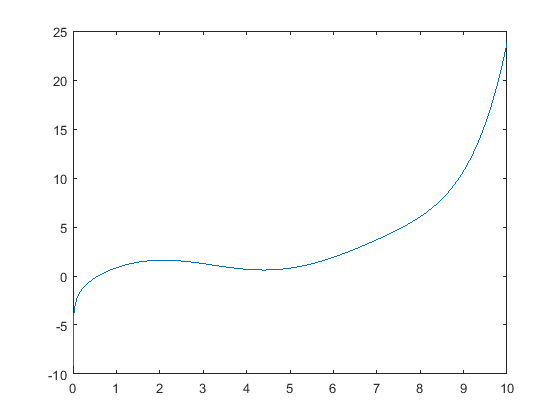

In [16]:
x = linspace(1e-4,10,1000);
y = zeros(1,1000);

for i=1:length(y)
    y(i)=exp(x(i))/1000+log(x(i))+sin(x(i));
end

figure
plot(x,y)

Brilliant. It looks continuous, so we can work with the bisection algorithm. So we have to choose two points, one to the left and one to the right of the solution. Checking the plot, we can choose the points 6 and 9:

In [17]:
x_left = 6;
x_right = 9;

fun_y = @(x) 5 - exp(x)/1000 - log(x) - sin(x)

fun_y(x_left)
fun_y(x_right)

fun_y = function_handle with value:
    @(x)5-exp(x)/1000-log(x)-sin(x)

ans = 3.0842

ans = -5.7124

However, notice a little detail: the previous function was decreasing, and this one is increasing, so the update rule must be updated!

In [18]:
x_left = 6;
x_right = 9;
dif = 1;

fun_y = @(x) 5 - exp(x)/1000 - log(x) - sin(x)

while abs(dif)>1e-4
    if dif<0
        x_right=(x_left+x_right)/2;
    elseif dif>0
        x_left=(x_left+x_right)/2;
    end
    dif = fun_y((x_left+x_right)/2);
end

x_eq1 = (x_left+x_right)/2
fun_y(x_eq1)

fun_y = function_handle with value:
    @(x)5-exp(x)/1000-log(x)-sin(x)

x_eq1 = 7.6024

ans = -9.4458e-05

Or we can use the previous rule, but using -fun_y() instead:

In [19]:
dif = 1;
x_left = 6;
x_right = 9;

while abs(dif)>1e-4
    dif = -fun_y((x_left+x_right)/2);
    if dif<0
        x_left=(x_left+x_right)/2;
    elseif dif>0
        x_right=(x_left+x_right)/2;
    end

end

x_eq2 = (x_left+x_right)/2
fun_y(x_eq2)

x_eq2 = 7.6024

ans = 1.4649e-05

Our solutions look similar, but they deliver different values. Let's check if there is any difference.

In [20]:
abs(x_eq2-x_eq1)

ans = 4.5776e-05

So they are slightly different, keep this in mind.

Doing the plot before using this algorithm is very important. This is not only because we need to check that the function is continuous, but also because we can have multiple solutions. Let's change our equation just a bit:

$$ y = \frac{\exp(x)}{1000}+\ln(x)+5\sin(x) $$
And we plot it:t:

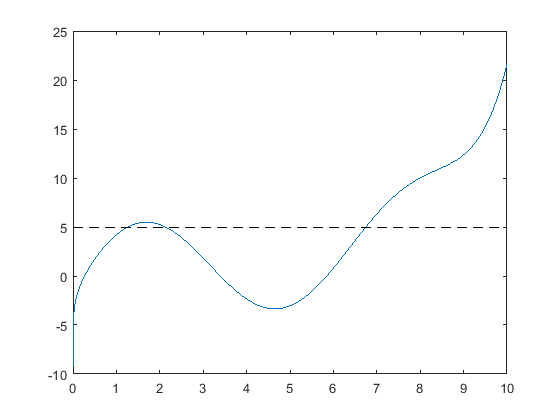

In [21]:
x = linspace(1e-4,10,1000);
y = zeros(1,1000);

for i=1:length(y)
    y(i)=exp(x(i))/1000+log(x(i))+5*sin(x(i));
end

figure
plot(x,y)
hold on
plot(x,5*ones(1,1000),'black','Linestyle','--')

In this case, we have three possible solutions. The solution of 7.5 is not valid anymore, because of the change in the function, but there is a solution close to it, let's find it.

In [22]:
x_left = 6;
x_right = 9;
dif=1

fun_y = @(x) 5 - exp(x)/1000 - log(x) - 5*sin(x) 

while abs(dif)>1e-4
    y_left=fun_y(x_left);
    y_right=fun_y(x_right);
    dif = fun_y((x_left+x_right)/2);
    if dif<0
        x_right=(x_left+x_right)/2;
    elseif dif>0
        x_left=(x_left+x_right)/2;
    end
end

x_eq = (x_left+x_right)/2
fun_y(x_eq)

dif = 1

fun_y = function_handle with value:
    @(x)5-exp(x)/1000-log(x)-5*sin(x)

x_eq = 6.7475

ans = 7.2933e-05

So the new solution is $6.7475$. We can also force the new solution close to 1 by choosing values that will lead to it:

In [23]:
x_left = 0.5;
x_right = 1.5;
dif = 1;

fun_y = @(x) 5 - exp(x)/1000 - log(x) - 5*sin(x) 

while abs(dif)>1e-4
    y_left=fun_y(x_left);
    y_right=fun_y(x_right);
    dif = fun_y((x_left+x_right)/2);
    if dif<0
        x_right=(x_left+x_right)/2;
    elseif dif>0
        x_left=(x_left+x_right)/2;
    end
end

x_eq = (x_left+x_right)/2
fun_y(x_eq)

fun_y = function_handle with value:
    @(x)5-exp(x)/1000-log(x)-5*sin(x)

x_eq = 1.2621

ans = -6.8592e-05

And the other one which is close to 2! (for this one we need to adapt the algorithm for decreasing functions)

In [24]:
x_left = 1.6;
x_right = 3.0;
dif = 1;

fun_y = @(x) 5 - exp(x)/1000 - log(x) - 5*sin(x) 

while abs(dif)>1e-4
    y_left=fun_y(x_left);
    y_right=fun_y(x_right);
    dif = -fun_y((x_left+x_right)/2);
    if dif<0
        x_right=(x_left+x_right)/2;
    elseif dif>0
        x_left=(x_left+x_right)/2;
    end
end

x_eq = (x_left+x_right)/2
fun_y(x_eq)

fun_y = function_handle with value:
    @(x)5-exp(x)/1000-log(x)-5*sin(x)

x_eq = 2.1314

ans = 1.4179e-04

However, if we do not know this and choose a broad range of initial numbers, we do not know which solution we will obtain.

In [25]:
x_left = 0.5;
x_right = 9;
dif = 1;

fun_y = @(x) 5 - exp(x)/1000 - log(x) - 5*sin(x) 

while abs(dif)>1e-4
    y_left=fun_y(x_left);
    y_right=fun_y(x_right);
    dif = fun_y((x_left+x_right)/2);
    if dif<0
        x_right=(x_left+x_right)/2;
    elseif dif>0
        x_left=(x_left+x_right)/2;
    end
end

x_eq = (x_left+x_right)/2
fun_y(x_eq)

fun_y = function_handle with value:
    @(x)5-exp(x)/1000-log(x)-5*sin(x)

x_eq = 6.7475

ans = 8.8586e-05

So be careful using this algorithm. It is fast, intuitive, and easy to understand but pretty random when you have several possible solutions.

There is one last thing we can use to improve our algorithm. Notice that with our current code, we need to know in advance if the function is decreasing or increasing. Can we improve our code to avoid this distinction? Think about it for a few minutes.

We can select which component to update regarding the sign of the objective function evaluated in the average point. If the function evaluated in the average has the same sign as the left side, then we must update that component. If it has the same sign as the right component, then we must update that one. To check if two objects share the sign we can use the sign() function.

In [26]:
x_left = 0.5;
x_right = 9;
dif = 1;

fun_y = @(x) 5 - exp(x)/1000 - log(x) - 5*sin(x) 

while abs(dif)>1e-4
    dif = fun_y((x_left+x_right)/2);
    if sign(fun_y((x_left+x_right)/2)) == sign(fun_y(x_left));
        x_left=(x_left+x_right)/2;
    elseif sign(fun_y((x_left+x_right)/2)) == sign(fun_y(x_right));
        x_right=(x_left+x_right)/2;
    end
end

x_eq = (x_left+x_right)/2
fun_y(x_eq)

fun_y = function_handle with value:
    @(x)5-exp(x)/1000-log(x)-5*sin(x)

x_eq = 6.7475

ans = 8.8586e-05

## 2. Fixed point algorithm

Great, the bisection algorithm is OK, and it is actually used to solve problems in current research. Another helpful algorithm is the fixed point algorithm. The idea of this procedure relies on having an equation that can be written as:

$$ f(x) = 0 $$

Then, adding x to both sides:

$$ f(x) + x = x $$

Then define the function $g(x)=f(x)+x$ and we are done:

$$ g(x) = x $$

Given this structure, a theorem shows that, given some conditions (not the point now), if we start iterating from a given $x_0$, this will converge to the fixed point.

$$ g(x^k) = x^{k+1}$$

Good, let's try it! Suppose the following function:

$$ f(x) = \cos(x)-3x + 1 = 0 $$

So our function g() is given by:

$$ g(x) = \frac{\cos(x)+1}{3} = x $$

And we can start the iteration with $x_0=0$:

In [27]:
dif = 1;
eps = 1e-4;
x_guess = 0;

fun_g = @(x) (cos(x)+1)/3;

while dif>eps
    x_new = fun_g(x_guess)
    dif = abs(x_new-x_guess)
    x_guess = x_new
end

x_new = 0.6667

dif = 0.6667

x_guess = 0.6667

x_new = 0.5953

dif = 0.0714

x_guess = 0.5953

x_new = 0.6093

dif = 0.0140

x_guess = 0.6093

x_new = 0.6067

dif = 0.0026

x_guess = 0.6067

x_new = 0.6072

dif = 5.0456e-04

x_guess = 0.6072

x_new = 0.6071

dif = 9.5926e-05

x_guess = 0.6071

Let's us check it:

In [28]:
fun_f = @(x) cos(x)-3*x+1;

fun_f(x_guess)

ans = 5.4727e-05

Excellent! It works. Now you can try this one:

$$f(x) = 2x^3 -2x - 5 = 0$$

Using the function g():

$$ g(x) = \left( \frac{2x+5}{2} \right)^{1/3} $$

And the initial guess the value $x_0=1.5$.

In [29]:
dif = 1;
eps = 1e-4;
x_guess = 1.5;

fun_g = @(x) ((2*x+5)/2)^(1/3);

while dif>eps
    x_new = fun_g(x_guess)
    dif = abs(x_new-x_guess)
    x_guess = x_new
end

x_new = 1.5874

dif = 0.0874

x_guess = 1.5874

x_new = 1.5989

dif = 0.0115

x_guess = 1.5989

x_new = 1.6004

dif = 0.0015

x_guess = 1.6004

x_new = 1.6006

dif = 1.9458e-04

x_guess = 1.6006

x_new = 1.6006

dif = 2.5318e-05

x_guess = 1.6006

In [30]:
fun_f = @(x) 2*x^3-2*x-5;

fun_f(x_guess)

ans = -5.0636e-05

Excellent. Now, the algorithm's details are as follows: The function g() and the initial guess must satisfy that the absolute value of the derivative of g() evaluated at the initial guess must be smaller than 1. This is a bit tricky, but in case you face something like this, the fixed-point algorithm is quite handy.

## 3. Newton-Raphson Algorithm

The Newton-Raphson algorithm is more sophisticated than the fixed point algorithm. In this case, the updating rule is given by:

$$ x^{k+1} = x^{k} - \frac{f(x^k)}{f'(x^k)} $$

Notice that there is a derivative in the updating rule. We can rely on pen and paper to compute them, but this is a MATLAB workshop, so luckily for us, MATLAB will have to calculate the derivatives. So, we will have a detour in our study of algorithms, and we will study symbolic expressions.

### 3.1 Symbolic expressions

Consider the polynomial given by:

$$ f(x) = x^2 + 4x - 5 $$

Here, we know that the derivate is given by:

$$ f'(x) = 2x + 4 $$

To make MATLAB take derivatives, we need to express the equation using the symbolic way. Here is the code to do this:

In [31]:
syms f(x)
f(x) = x^2 + 4*x - 5
f_x(x) = diff(f,x)

Notice that it takes a while, but it does the job. This can also work with two or more variables.

In [32]:
syms f(x,y)
f(x,y) = x^2 + 1/2*y^2 + 4*x + 2*y - 5
f_x(x,y) = diff(f,x)
f_y(x,y) = diff(f,y)

And naturally, we can take double derivatives and crossed derivatives.

In [33]:
syms f(x,y)
f(x,y) = x^2 + 1/2*y^2 + 4*x + 2*y - 5
f_x(x,y) = diff(f,x)
f_y(x,y) = diff(f,y)
df_x(x,y)=diff(f_x,x)
df_y(x,y)=diff(f_y,y)

Great! Now let's evaluate all the functions in some values:

In [34]:
f(5,4)
f_x(3,2)
f_y(1,4)
df_x(0,9)
df_y(9,0)

### 3.2 Newton-Raphson Algorithm (now for real)

Now we have learned symbolic expressions, we can easily write a code for the Newton-Raphson algorithm.

In [35]:
syms f(x)
f(x) = x^2 + 4*x - 5;
f_x(x) = diff(f,x);

x_g = 2;
dif = 1;
eps = 1e-4;

while abs(dif)>eps
    x_n = x_g - f(x_g)/f_x(x_g);
    dif = x_n - x_g;
    x_g = x_n;
end

x_g

Hmm, something weird is happening to the variable $x_g$. Let's check the class:

In [36]:
class(x_g)

ans = 'sym'

Of course! $x_g$ is a symbolic object. So if we want back a regular number, we just have to impose that class to the object:

In [37]:
x_g = double(x_g)

x_g = 1.0000

Alright, the solution is good. Can we do something just a bit more complicated? Let's try this:

In [38]:
syms f(x)
f(x) = -x^6 + x^5 + 2*x^4 - 2*x^3 + x^2 + 2*x -1;
f_x(x) = diff(f,x);

x_g = 2;
dif = 1;
eps = 1e-3;

while abs(dif)>eps
    x_n = x_g - f(x_g)/f_x(x_g);
    dif = x_n - x_g;
    x_g = x_n;
end

x_g = double(x_g)

double(f(x_g))

x_g = 1.8019

ans = -1.7187e-06

Great! This works pretty fast. Now, we will move to the approximation methods.

## 4. Linear methods for function approximation

Imagine we have a complicated iteration in which the main function to solve takes a long time to evaluate. This often happens with large functions, including integrals. In this case, a good strategy is to approximate the function to make it easier and faster to compute. However, approximating a function is not trivial since the simpler our approximation method, the more error we will have.

Let's work with this function:

$$ f(x) = \frac{1}{2}x^2 - \frac{1}{3} x^3 + \frac{1}{4}cos(x) - \frac{1}{5}sin(x) + \frac{1}{6}e^x $$

We will plot this function in the domain [0,6]. But, since the function is "costly" to compute, we can only access 10 points.

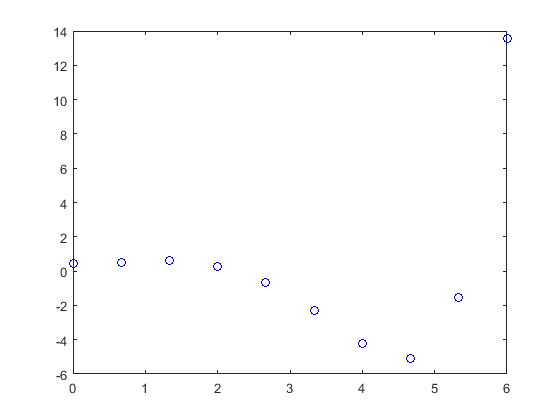

In [43]:
x = linspace(0,6,10);

fx = zeros(1,10);

for i=1:length(x)
    fx(i) = 1/2*x(i)^2 - 1/3*x(i)^3 + 1/4*cos(x(i)) - 1/5*sin(x(i)) +1/6*exp(x(i));
end

figure
plot(x,fx,'o','color','blue')

Notice that we can also vectorize this code following this structure:

In [44]:
fx2 = 1/2*x.^2 - 1/3*x.^3 + 1/4*cos(x) - 1/5*sin(x) +1/6*exp(x);

dif = sum(abs(fx-fx2))

dif = 0

Now, linear approximation consists of using the information that we have (the ten real points) to understand the underlying function. Of course, MATLAB has a function called interp1() that performs linear approximations for us. We will approximate the function using 10 points. This is how it works:

xq = 1x10 double
         0    0.6667    1.3333    2.0000    2.6667    3.3333    4.0000    4.6667    5.3333    6.0000

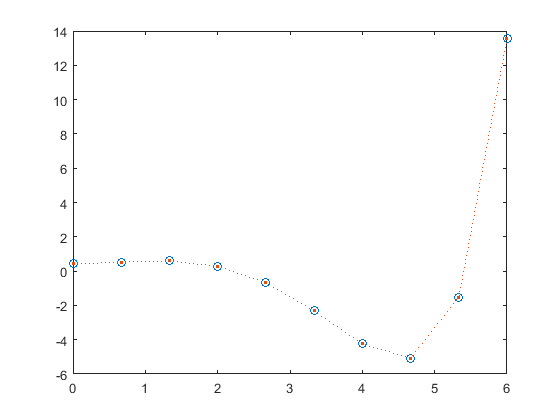

In [45]:
xq = linspace(0,6,10);
xq
linear_approx = interp1(x,fx,xq);

plot(x,fx,'o',xq,linear_approx,':.');

As you can see, linear interpolation basically consists of uniting the points with straight lines. However, the underlying process is more sophisticated. The function estimates a linear model given the true data points and applies that model to the points that we request. 

In the case of an approximation using the exact same ten initial points, we will see that the approximation passes through every one of the ten real points, with an accurate prediction for each. However, if we use more points, we can have a different prediction because the linear regression coefficient will change. Here is an example:

xq = 1x20 double
         0    0.3158    0.6316    0.9474    1.2632    1.5789    1.8947    2.2105    2.5263    2.8421    3.1579    3.4737    3.7895    4.1053    4.4211    4.7368    5.0526    5.3684    5.6842    6.0000

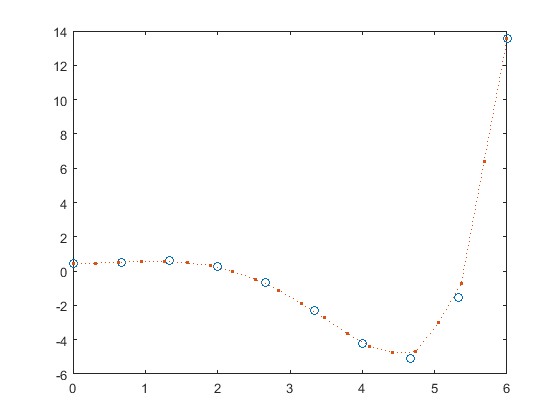

In [46]:
xq = linspace(0,6,20);
xq
linear_approx = interp1(x,fx,xq);

plot(x,fx,'o',xq,linear_approx,':.');

Notice that the points are different. Because of that, our linear interpolation will make mistakes at the true data points that we know.

However, every time that you use more points, it is likely that the error ate the evaluated points will be reduced.

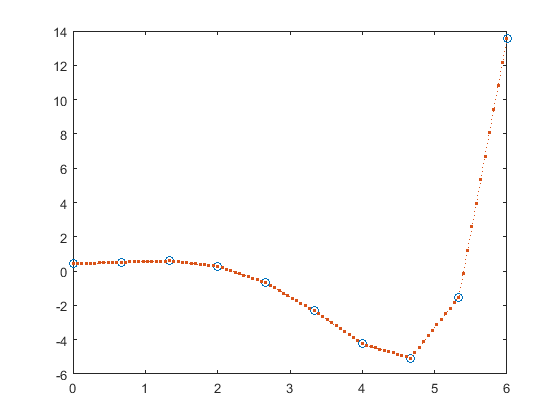

In [47]:
xq = linspace(0,6,100);
linear_approx = interp1(x,fx,xq);

plot(x,fx,'o',xq,linear_approx,':.');

Notice that it does not matter how many points we use in the approximation; there will always be a linear relation between the points because the underlying model is a linear regression.

How accurate is this estimation? Well, we can plot both approximation and the real function for the 100 selected points and see. However, we will sophisticate our code a bit. We will implement the function we are using through an anonymous function. Then, at the moment of plotting, we will apply that anonymous function to the requested data points.

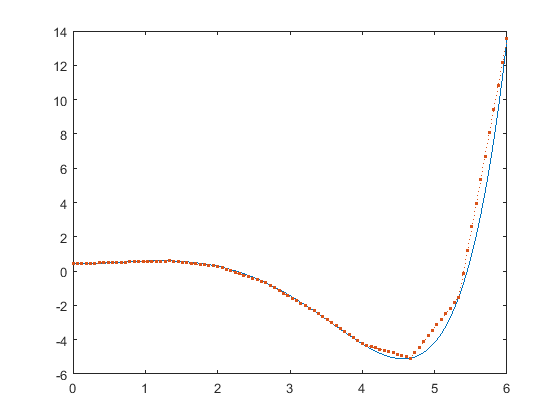

In [48]:
xq = linspace(0,6,100);
linear_approx = interp1(x,fx,xq);

fun_app = @(x) 1/2*x.^2 - 1/3*x.^3 + 1/4*cos(x) - 1/5*sin(x) +1/6*exp(x);

plot(xq,fun_app(xq),'-',xq,linear_approx,':.');

This makes sense: the linear approximation works while the function moves linearly, and there is a significant error when the curve behaves non-linearly. Now, we will compute the error using the sum of the squares of errors as a metric, like in OLS.

In [49]:
xq = linspace(0,6,100);
linear_approx = interp1(x,fx,xq);

errors = (fun_app(xq) - linear_approx);

size(errors)

tic
metric = errors*errors'
toc

ans = 1x2 double
     1   100

metric = 31.3585

Elapsed time is 0.003151 seconds.


How cool was that? Were you expecting to do a loop for each error and then create a variable containing the sum of the squares? We can do that too.

In [50]:
tic

metric = 0;

for i = 1:length(xq)
    error= fun_app(xq(i))-linear_approx(i);
    error_square = error^2;
    metric = metric + error_square;
end

metric

toc

metric = 31.3585

Elapsed time is 0.007283 seconds.


Here is a philosophical debate about coding. One group thinks that code should be precise and do what it is expected to, so you do not need to explain it. Another group of people believes that you can use code to do efficient things, although it may not be intuitive, and because of that, you should comment on your code to allow other people (and the future yourself) to understand it.

Which path are you going to follow? Well, really it is up to you, so choose wisely.

Before finishing with linear approximations, I would like to do something sophisticated to show off all the things that we have learned already. We are going to generate a function that will take two values. The scalars will represent the minimum and maximum number of points used in a linear approximation. So, the function will compute the **average error per point** for each scalar in between them, and the output will be a plot. On the x-axis, we will plot the number of points used in the approximation and, on the y-axis, the error.

To start, we will create the code that computes the error for just one scalar.

In [51]:
scalar = 100;

xq = linspace(0,6,scalar);
linear_approx = interp1(x,fx,xq);

% Computing errors
errors = (fun_app(xq) - linear_approx);

% Sum of errors square through vector multiplication
sum_errors_square = (errors*errors')

% Square error per point
metric = sum_errors_square/length(errors)

sum_errors_square = 31.3585

metric = 0.3136

Now, given the two scalars, we will generate two vectors. One will store the number of points used in the approximation, and the other will store the metric for those points.

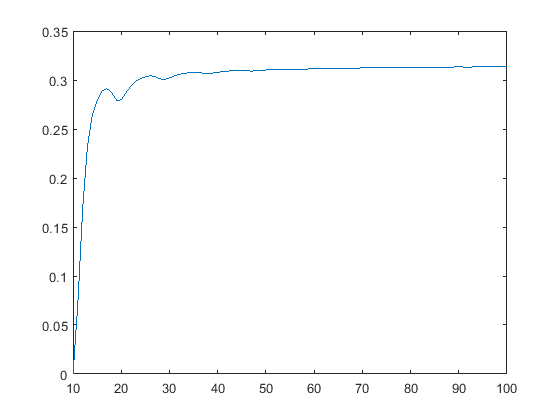

In [52]:
scalar_min = 10;
scalar_max = 100;

vector_errors=zeros(scalar_max-scalar_min,1);
vector_points=zeros(scalar_max-scalar_min,1);

for i=scalar_min:scalar_max
    
    vector_points(i-scalar_min+1)=i;
    
    xq = linspace(0,6,i);
    linear_approx = interp1(x,fx,xq);

    % Computing errors
    errors = (fun_app(xq) - linear_approx);

    % Sum of errors square through vector multiplication
    sum_errors_square = (errors*errors');

    % Square error per point
    metric = sum_errors_square/length(errors);
    
    vector_errors(i-scalar_min+1) = metric;
end

%vector_points
%vector_errors

plot(vector_points,vector_errors)

And now we just implement the function:

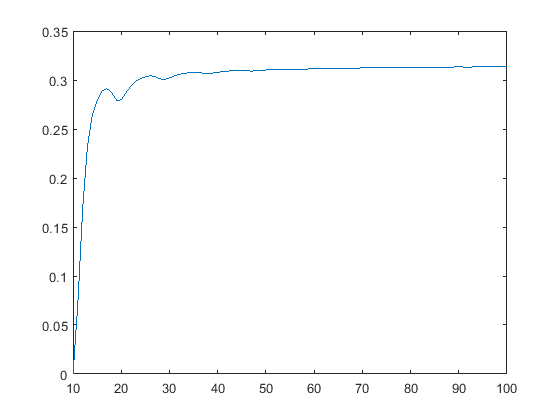

In [53]:
plot_error_points(scalar_min,scalar_max);

We can see something interesting. Adding extra points does not decrease the errors per point. In fact, the error increases a bit, and finally, it converges.

## 5. Cubic methods for function approximation

Cubic approximation. This would be pretty straightforward. It follows the same idea as linear approximation, but instead of a linear model, it uses a polynomial of order three to estimate the model. And that is it. 

To implement this in MATLAB, we just have to include the option 'cubic'

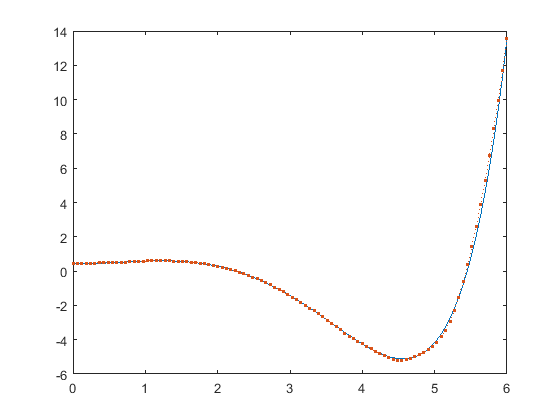

In [54]:
xq = linspace(0,6,100);
cubic_approx = interp1(x,fx,xq,'cubic');

fun_app = @(x) 1/2*x.^2 - 1/3*x.^3 + 1/4*cos(x) - 1/5*sin(x) +1/6*exp(x);

plot(xq,fun_app(xq),'-',xq,cubic_approx,':.');

Wows. This cubic method is good for predicting this function. Let's check the error.

In [55]:
xq = linspace(0,6,100);
cubic_approx = interp1(x,fx,xq,'cubic');

errors = (fun_app(xq) - cubic_approx);

metric = errors*errors'

metric = 2.9692

And if we check how it behaves with different points.

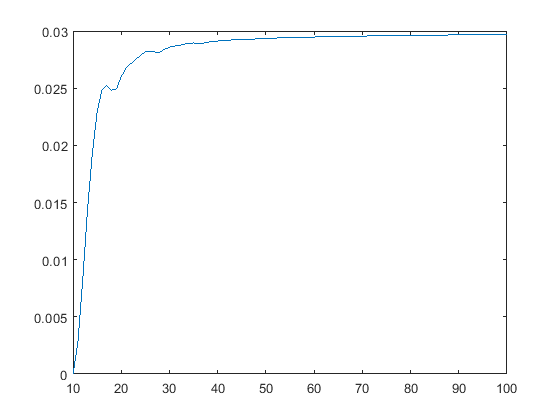

In [56]:
plot_error_points_cubic(scalar_min,scalar_max);

Notice that the error also converges. More importantly, the error is 1/10 of the error in a linear model. The improvement is significant.

But, should this be surprising? If we check our function, the highest degree polynomial is three and we are using a cubic model to approximate it. Let's try a polynomial of order five and an exponential to check how cubic methods behave with the following function:

$$ f(x) = \frac{1}{10,000}x^5 - \frac{1}{1,000}x^4 + \frac{1}{100} x^3 - \frac{1}{10}x^2 + 10\sin(x) + 10 -\frac{e^x}{100,000}$$

fun_app = function_handle with value:
    @(x)1/10000*x.^5-1/1000*x.^4+1/100*x.^3-1/10*x.^2+10*sin(x)+10-exp(x)/100000

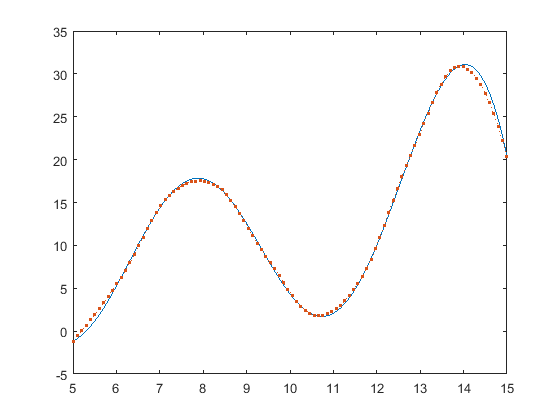

Elapsed time is 0.022454 seconds.


In [57]:
tic
fun_app = @(x) 1/10000*x.^5 - 1/1000*x.^4 + 1/100*x.^3 - 1/10*x.^2 + 10*sin(x) + 10 - exp(x)/100000

x = linspace(5,15,10);
fx = fun_app(x);

xq = linspace(5,15,100);
cubic_approx = interp1(x,fx,xq,'cubic');

plot(xq,fun_app(xq),'-',xq,cubic_approx,':.');
toc

OK, this is not bad at all, but it is far from a perfect fit. Let's compute the error and move to the following method.

In [58]:
errors = (fun_app(xq) - cubic_approx);

metric = errors*errors'

metric = 14.1015

## 6. Spline methods for function approximation

The spline method is more complex than the previous two. This course does not aim to enter the details, but the spline method will find the most "efficient" polynomial to represent the function that we want to approximate.

It is the method by default since if the best way of approximating something is linear, it will deliver the same result as the linear method. If the best polynomial is cubic, it will deliver the same cubic polynomial as the cubic method. However, notice that the spline method will take longer to compute.

How do we implement it? We just have to change the option method to 'spline'. And that it is.

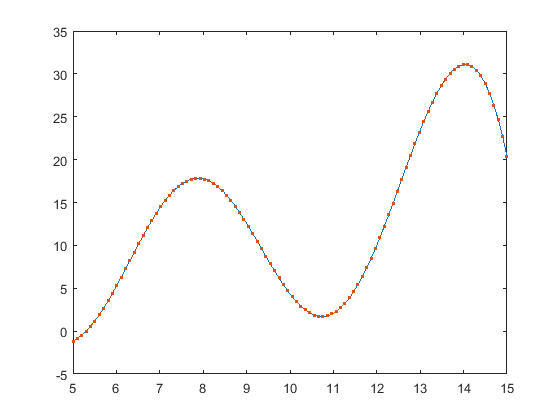

Elapsed time is 0.019540 seconds.


In [59]:
tic
fun_app = @(x) 1/10000*x.^5 - 1/1000*x.^4 + 1/100*x.^3 - 1/10*x.^2 + 10*sin(x) + 10 - exp(x)/100000;

x = linspace(5,15,10);
fx = fun_app(x);

xq = linspace(5,15,100);
spline_approx = interp1(x,fx,xq,'spline');

plot(xq,fun_app(xq),'-',xq,spline_approx,':.');
toc

And this looks very good! However, notice that it takes **ten times** more time. Let's check the error:

In [60]:
errors = (fun_app(xq) - spline_approx);

metric = errors*errors'

metric = 0.0691

## 7. Spectral methods for function approximation

"Spectral methods" is a pretty cool and sophisticated name for intelligent ways of looking at the points at which we will evaluate the function to obtain the data required to run the interpolation using any method.

If you think about what we have been doing, we have estimated the real function only ten times using a vector of evenly separated points. Why do they have to be evenly separated? There is no reason, really. 

To understand the power of these methods. Let's check the following innocent function:

$$ f(x) = \frac{1}{1+25x^2} $$

If we plot this function, we will obtain the following:

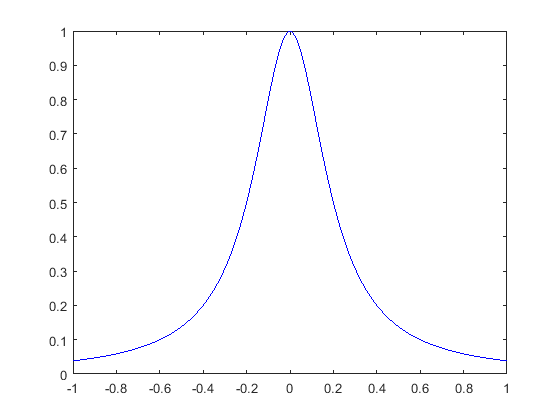

In [61]:
runge_fun = @(x) 1./(1+25*x.^2);

x = linspace(-1,1,100);

plot(x,runge_fun(x),'blue','Linestyle','-')

And now, we will use the spline method to see how to approximate this function using 10 points:

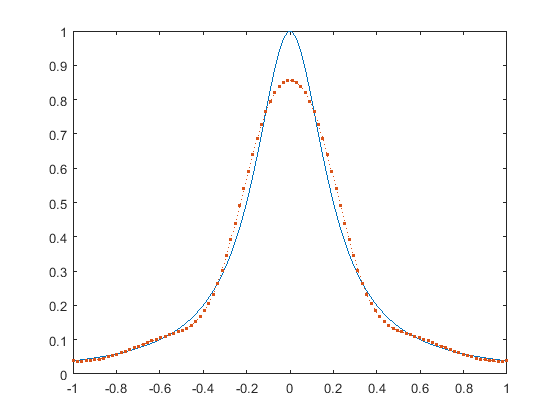

In [62]:
x = linspace(-1,1,10);
fx = runge_fun(x);

xq = linspace(-1,1,100);
spline_approx = interp1(x,fx,xq,'spline');

plot(xq,runge_fun(xq),'-',xq,spline_approx,':.');

In [63]:
errors = (runge_fun(xq) - spline_approx);

metric_spline = errors*errors'

metric_spline = 0.1660

What is happening here? Our splendid spline method is not capable of correctly approximating that function. It will not help to include more points in the approximation:

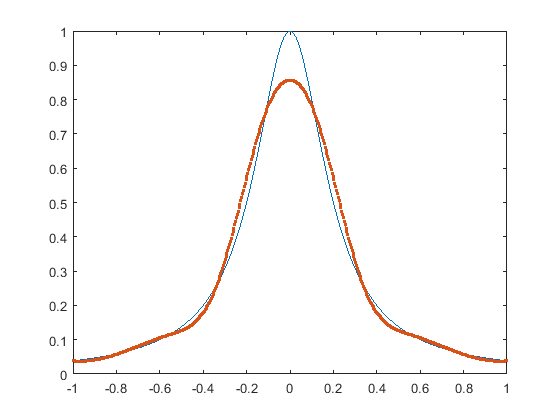

In [64]:
x = linspace(-1,1,10);
fx = runge_fun(x);

xq = linspace(-1,1,500);
spline_approx = interp1(x,fx,xq,'spline');

plot(xq,runge_fun(xq),'-',xq,spline_approx,':.');

The problem is that the function behaves weirdly between two data points, especially those in the middle. To solve this issue, we must include more information in our approximation and more points in the costly evaluations.

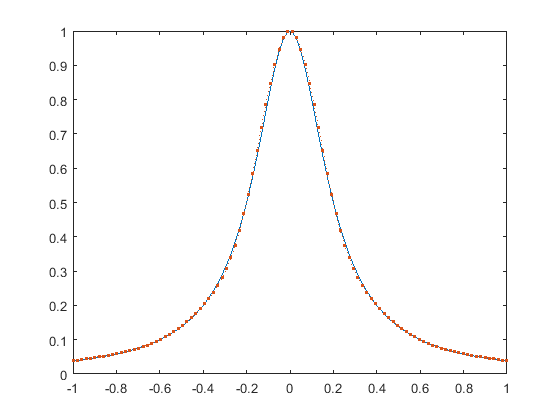

In [65]:
x = linspace(-1,1,11);
fx = runge_fun(x);

xq = linspace(-1,1,100);
spline_approx = interp1(x,fx,xq,'spline');

plot(xq,runge_fun(xq),'-',xq,spline_approx,':.');

In [66]:
errors = (runge_fun(xq) - spline_approx);

metric_spline = errors*errors'

metric_spline = 0.0051

OK, this solves the problem, but not in practice. One reason why we are learning how to approximate functions is because evaluating the function is costly, and our current solution involves evaluating the function 50% more times.

Luckily for us, there is a spectral method that uses what is called Chebyshev polynomials, which we will use to improve our estimation. The idea behind this is quite simple. Instead of evaluating the function in evenly spaced points, we will use specific points determined by the solution to a group of polynomials: the Chebyshev polynomials.

The Chebyshev polynomials follow this rule:

$$ T_0 (x) = 1 $$

$$ T_1 (x) = x $$

$$ T_{n+1} (x) = 2x T_n (x) - T_{n-1} (x) $$

And then, the first five polynomials are:

$$ T_0(x)=1 $$ 

$$ T_1(x)=x $$

$$ T_2(x)=2x^2 - 1 $$

$$ T_3(x)=4x^3 - 3x $$

$$ T_4(x)=8x^4-8x^2+1$$



In MATLAB we can implement these polynomials with the function chebyshevT(). First, we will plot the polynomials:

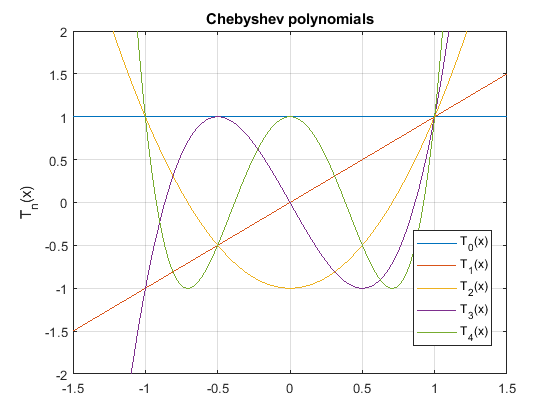

In [67]:
syms x y
fplot(chebyshevT(0:4,x))
axis([-1.5 1.5 -2 2])
grid on

ylabel('T_n(x)')
legend('T_0(x)','T_1(x)','T_2(x)','T_3(x)','T_4(x)','Location','Best')
title('Chebyshev polynomials')

The solution to the polynomials is given by the following function, which will depend on the number of nodes and the actual one we are computing. If we restrict the function domain to [-1,1] the solution to the polynomials can be written as:

$$ x(k,n) = -\cos\left( \frac{(2k-1)\pi}{2n} \right) $$

So, let's try with ten nodes. In that case, the values we have to evaluate in our function are:

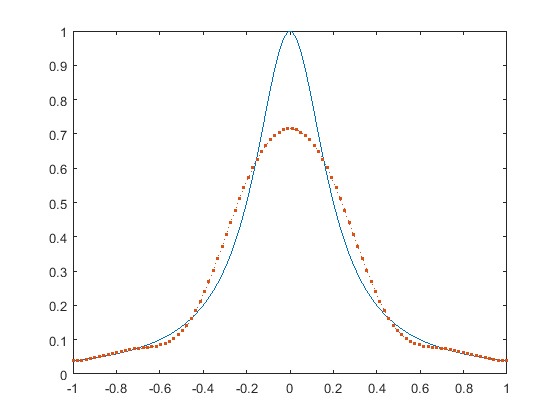

metric_chev = 0.6770

In [68]:
n = 10;
x = zeros(n,1);

for k=1:n
    x(k)=cos(((2*k-1)*pi)/(2*n));
end

x = sort(x);

fx = runge_fun(x);

xq = linspace(-1,1,100);
chev_approx = interp1(x,fx,xq,'spline');

plot(xq,runge_fun(xq),'-',xq,chev_approx,':.');

errors = (runge_fun(xq) - chev_approx);

metric_chev = errors*errors'

Strangely, it does not improve the result. Why is this happening? This happens because Chebyshev polynomials focus on the extreme points of the distribution, so they only will improve the estimation if the function behaves irregularly close to the extremes. Let's try a new function:

$$ f(x) = x -  \left \lfloor{x}\right \rfloor  $$

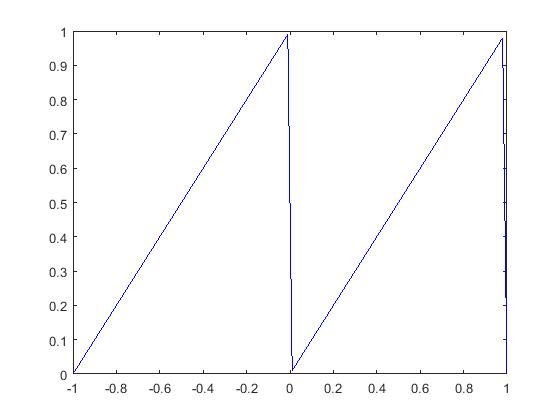

In [69]:
teeth_fun = @(x) x-floor(x);

x = linspace(-1,1,100);

plot(x,teeth_fun(x),'blue','Linestyle','-')

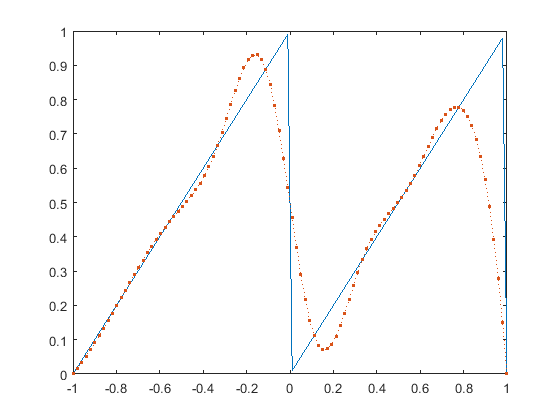

metric_spline = 2.7901

In [70]:
x = linspace(-1,1,10);
fx = teeth_fun(x);

xq = linspace(-1,1,100);
spline_approx = interp1(x,fx,xq,'spline');

plot(xq,teeth_fun(xq),'-',xq,spline_approx,':.');

errors = (teeth_fun(xq) - spline_approx);

metric_spline = errors*errors'

Uuuh, this looks pretty bad. Let's see if the use of Chebyshev polynomials can help here:

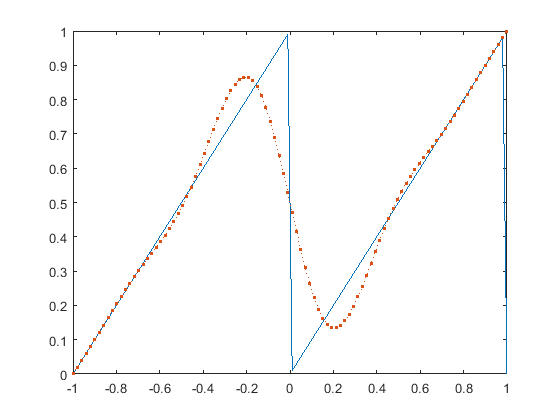

metric_chev = 2.2653

This estimation is 18.8% more precise than the evenly spaced method.


In [71]:
n = 10;
x = zeros(n,1);

for k=1:n
    x(k)=cos(((2*k-1)*pi)/(2*n));
end

x = sort(x);

fx = teeth_fun(x);

xq = linspace(-1,1,100);
chev_approx = interp1(x,fx,xq,'spline');

plot(xq,teeth_fun(xq),'-',xq,chev_approx,':.');

errors = (teeth_fun(xq) - chev_approx);

metric_chev = errors*errors'

gain = (1 - metric_chev/metric_spline)*100;

message = ['This estimation is ', num2str(round(gain,1)), '% more precise than the evenly spaced method.'];

disp(message)

Great! We are done with this lecture. Now, you can tell your friends you learned spectral methods. I hope you enjoyed this lecture! See you next time.